In [28]:
#import Library
import pandas as pd
import numpy as np
import seaborn as sns


In [29]:
# import librarys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
    # Read the dataSet
too = pd.read_csv("./income.csv",na_values=" ?")
too.head(2)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [31]:
tot = too.copy()

In [32]:
tot.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [33]:
# remove the missing Value
missing = tot[tot.isnull().any(axis=1)]
print(missing)

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [34]:
# Delete Missing Value
tot1=tot.dropna(axis=0)
print(tot1)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

In [35]:
tot = tot1.copy()

In [36]:
# We can see All of missing Data Deleted
tot.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [37]:
tot["JobType"].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: JobType, dtype: int64

In [38]:
corrlation = tot.corr()

In [39]:
print(corrlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


In [40]:
tot.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [51]:
gender = pd.crosstab(index=tot["gender"],
                    columns="count",
                     margins=True,
                    normalize=True
                    )
print(gender)

col_0       count       All
gender                     
 Female  0.324315  0.324315
 Male    0.675685  0.675685
All      1.000000  1.000000


In [52]:
sal = pd.crosstab( index =tot["gender"],
                   columns=tot["SalStat"],
                   margins=True,
                   normalize = "index")


print(sal)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


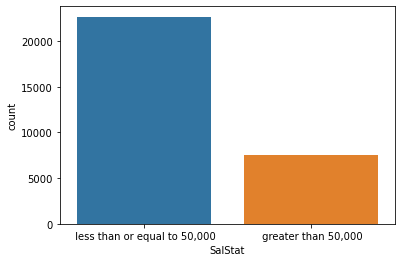

In [54]:
Salstat = sns.countplot(tot["SalStat"])